# Note: Modify the paths to the relevant data.

In [ ]:
!pip install gensim==3.8.3


     |████████████████████████████████| 24.2 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 34.2 MB/s 
     |████████████████████████████████| 15.7 MB 31.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=31092e7753f43871c2e4fffeac38073046ee8c52fcf5306c3de36e611afced8c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [ ]:
import os
import re
import pandas as pd
import numpy as np
from tqdm import tqdm

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser

import spacy
from nltk.corpus import stopwords

# for plotting
import pyLDAvis.gensim
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

import pickle
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
post= pd.read_csv('/content/drive/MyDrive/DS300/RS_DA/DATA_vfo/DATASET/Cleaned/POST_cleaned.csv')

In [ ]:
#Utils for Aggregate_text
def get_text(r_u, id_text):
  if(id_text==0): return pass_nan(r_u.title_post_cleaned.values[0])
  if(id_text==1): return pass_nan(r_u.content_post_cleaned.values[0])
  if(id_text==2): return pass_nan(r_u.tags_cleaned.values[0])

def pass_nan(text):
  if(text is np.nan): return ''
  return text

def Aggregate_text(id_p,title=1,content=1 ,tags=1): # Aggregate title_post, content_post, and tags into the text field.
  r_u=post[post['id_post']==id_p]
  text=''
  if(len(r_u)==0): return text
  else:
    feature=[title,content,tags]
    for i in range(3):
      if(feature[i]==1): text += get_text(r_u, i)+' '
    return text



In [ ]:
lda_dic = corpora.Dictionary(token_docs)
lda_dic.filter_extremes(no_above=0.5)

In [ ]:
len(lda_dic)

1762

In [ ]:
lda_corpus=[lda_dic.doc2bow(r) for r in token_docs]

In [ ]:
lda_tfidf = gensim.models.TfidfModel(lda_corpus)

In [ ]:
lda_corpus = lda_tfidf[lda_corpus]
lda_corpus[0]

[(0, 0.5149690662751346),
 (1, 0.5765928933988368),
 (2, 0.2006185898569616),
 (3, 0.6017471873349121)]

In [ ]:
lda_tfidf[lda_dic.doc2bow('mình hỏi về thiết_kế kichikichi'.split())]

[(21, 0.5512082164587655),
 (342, 0.4769573930062151),
 (749, 0.6846029121797991)]

# build LDA

In [ ]:
dic= lda_dic
model_tfidf=lda_tfidf
corpus=[dic.doc2bow(r) for r in token_docs]
corpus=model_tfidf[corpus]
corpus[0]

[(0, 0.5149690662751346),
 (1, 0.5765928933988368),
 (2, 0.2006185898569616),
 (3, 0.6017471873349121)]

In [ ]:
len(corpus)

16278

In [ ]:
coherence = []
for k in range(4,15):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus=corpus, num_topics=k, \
               id2word = dic, passes=40,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=token_docs,\
         dictionary=dic, coherence='c_v')   
    print(cm.get_coherence()) 
    print('-----------------------')                   
    coherence.append((k,cm.get_coherence()))

Round: 4
0.33539141201584255
-----------------------
Round: 5
0.29316560798264113
-----------------------
Round: 6
0.3254681648535096
-----------------------
Round: 7
0.33775231334346517
-----------------------
Round: 8
0.3159220779594618
-----------------------
Round: 9
0.36029481276606634
-----------------------
Round: 10
0.3503458807958184
-----------------------
Round: 11
0.37577237800757435
-----------------------
Round: 12
0.3711171310332017
-----------------------
Round: 13
0.40923804560692684
-----------------------
Round: 14
0.3938866490116107
-----------------------


[(4, 0.5647761690029556), (5, 0.5849440500508015), (6, 0.5304028663158894), (7, 0.5914908068723826), (8, 0.6059798490640232), (9, 0.6016050872942228), (10, 0.5789142684564665), (11, 0.6409672738787294), (12, 0.6017896812821338), (13, 0.5505142719740548), (14, 0.5942916290653318)]


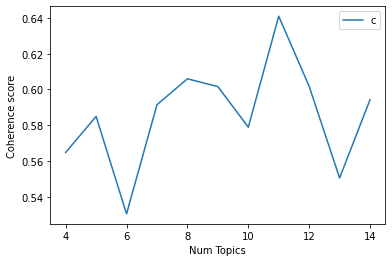

In [ ]:
print(coherence)
a=[x[1] for x in coherence]
plt.plot(np.arange(4,15),a)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# choose k=13 and tuning

In [ ]:
lda_model =gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=13, \
               id2word = dic, passes=40,\
               iterations=200, chunksize = 10000, eval_every = None)
                                            
                                           
print(gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=token_docs,dictionary=dic, coherence='c_v').get_coherence())

0.3938866490116107


In [ ]:
lda_model.print_topics()

[(0,
  '0.058*"phần_mềm" + 0.050*"video" + 0.036*"key" + 0.033*"youtube" + 0.031*"gỡ" + 0.030*"idm" + 0.022*"help" + 0.022*"me" + 0.018*"nhạc" + 0.016*"hoạt_động"'),
 (1,
  '0.029*"google" + 0.028*"chrome" + 0.028*"chữ" + 0.024*"giúp_đỡ" + 0.024*"trình_duyệt" + 0.024*"font" + 0.022*"link" + 0.021*"tải" + 0.019*"lỗi" + 0.018*"photoshop"'),
 (2,
  '0.027*"gta" + 0.017*"tin_học" + 0.016*"v" + 0.016*"tại_sao" + 0.015*"chip" + 0.014*"exe" + 0.012*"thông_tin" + 0.012*"lỗi" + 0.011*"flash" + 0.011*"hệ_thống"'),
 (3,
  '0.029*"office" + 0.029*"ổ_cứng" + 0.025*"ram" + 0.024*"lỗi" + 0.022*"nâng_cấp" + 0.022*"ổ" + 0.021*"thắc_mắc" + 0.021*"file" + 0.017*"dữ_liệu" + 0.017*"xóa"'),
 (4,
  '0.035*"xanh" + 0.031*"cài_đặt" + 0.027*"ứng_dụng" + 0.022*"phát" + 0.022*"iphone" + 0.022*"màn_hình" + 0.020*"lỗi" + 0.019*"main" + 0.019*"pc" + 0.019*"chặn"'),
 (5,
  '0.068*"tư_vấn" + 0.053*"mua" + 0.047*"laptop" + 0.024*"asus" + 0.022*"dell" + 0.021*"bàn_phím" + 0.018*"active" + 0.016*"pass" + 0.015*"mấy" + 0.

In [ ]:
lda_model.save('/content/drive/MyDrive/DS300/Model_RS_DA/CB/model_LDA_101_1762.model')

In [ ]:
model=gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/DS300/Model_RS_DA/CB/model_LDA_101_1762.model')

In [ ]:
model.show_topics(15, num_words=10, formatted=False)

[(0,
  [('phần_mềm', 0.058215965),
   ('video', 0.049581587),
   ('key', 0.035830133),
   ('youtube', 0.032805208),
   ('gỡ', 0.0308333),
   ('idm', 0.029617993),
   ('help', 0.022310365),
   ('me', 0.022207715),
   ('nhạc', 0.017707635),
   ('hoạt_động', 0.016003734)]),
 (1,
  [('google', 0.02940828),
   ('chrome', 0.028370997),
   ('chữ', 0.027856342),
   ('giúp_đỡ', 0.024444206),
   ('trình_duyệt', 0.02376338),
   ('font', 0.02361111),
   ('link', 0.02246638),
   ('tải', 0.021378797),
   ('lỗi', 0.019369865),
   ('photoshop', 0.018135175)]),
 (2,
  [('gta', 0.027138188),
   ('tin_học', 0.016620332),
   ('v', 0.01582401),
   ('tại_sao', 0.015549821),
   ('chip', 0.014881555),
   ('exe', 0.01351037),
   ('thông_tin', 0.012156227),
   ('lỗi', 0.012125348),
   ('flash', 0.011071397),
   ('hệ_thống', 0.011017284)]),
 (3,
  [('office', 0.02939781),
   ('ổ_cứng', 0.028861921),
   ('ram', 0.024614735),
   ('lỗi', 0.023593588),
   ('nâng_cấp', 0.022431867),
   ('ổ', 0.022129774),
   ('thắc_m

In [ ]:
model.print_topics()

[(0,
  '0.048*"ram" + 0.045*"cấu_hình" + 0.028*"máy" + 0.028*"help" + 0.024*"me" + 0.018*"laptop" + 0.018*"asus" + 0.015*"dây" + 0.015*"lồn" + 0.014*"kiểm_tra"'),
 (1,
  '0.076*"win" + 0.056*"ghost" + 0.045*"xp" + 0.035*"update" + 0.028*"cài" + 0.026*"key" + 0.022*"bản_quyền" + 0.021*"dung_lượng" + 0.020*"windows" + 0.018*"window"'),
 (2,
  '0.051*"khởi_động" + 0.050*"card" + 0.036*"màn_hình" + 0.026*"chậm" + 0.024*"máy" + 0.024*"máy_tính" + 0.020*"laptop" + 0.018*"main" + 0.018*"chạy" + 0.015*"treo"'),
 (3,
  '0.048*"phần_mềm" + 0.038*"virus" + 0.030*"tiếng" + 0.029*"việt" + 0.022*"diệt" + 0.019*"hỏi_đáp" + 0.019*"bàn_phím" + 0.018*"ảnh" + 0.017*"phim" + 0.016*"nam"'),
 (4,
  '0.067*"cài" + 0.067*"giúp" + 0.059*"lỗi" + 0.052*"win" + 0.047*"usb" + 0.046*"driver" + 0.034*"ổ_cứng" + 0.033*"máy_tính" + 0.024*"âm_thanh" + 0.021*"boot"'),
 (5,
  '0.038*"giúp_đỡ" + 0.030*"file" + 0.028*"word" + 0.024*"lỗi" + 0.020*"the" + 0.017*"mong" + 0.017*"máy_in" + 0.016*"not" + 0.015*"to" + 0.014*"lập"

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dic)
vis


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12     0.104923  0.007924       1        1  9.772883
3      0.206344 -0.139691       2        1  9.466024
1      0.081359  0.183769       3        1  8.254543
11    -0.011345  0.183884       4        1  8.248329
10    -0.188226 -0.070570       5        1  8.003379
5     -0.084352 -0.167626       6        1  7.696025
7      0.071222 -0.185969       7        1  7.620884
9     -0.167253  0.056479       8        1  7.320831
6     -0.136095 -0.008206       9        1  7.267742
0      0.027633  0.022811      10        1  7.243750
8      0.095193  0.093223      11        1  6.576337
4     -0.113647  0.013004      12        1  6.333917
2      0.114244  0.010970      13        1  6.195355, topic_info=           Term        Freq       Total Category  logprob  loglift
252         usb  166.000000  166.000000  Default  30.0000  30.0000
113      tư_vấn  187.000000  187.000000  Default  29.0000  29.0000
58    khởi_động  178.000000  178.000000  Default  28.0000  28.0000
479        wifi  187.000000  187.000000  Default  27.0000  27.0000
125    màn_hình  271.000000  271.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1342     player   13.663555   25.367086  Topic13  -4.9141   2.1626
41         giúp   15.974738  417.472390  Topic13  -4.7578  -0.4818
9           cài   14.833748  354.809961  Topic13  -4.8319  -0.3933
76     phần_mềm   14.535891  306.097187  Topic13  -4.8522  -0.2659
249      driver   14.317554  162.104567  Topic13  -4.8674   0.3546

[690 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
706       1  0.962460     32bit
1489      8  0.959276        3d
1436      8  0.961129        3g
739       7  0.957173       4gb
928      10  0.814655    4share
...     ...       ...       ...
240      11  0.113998    ổ_cứng
890       2  0.363013     ổ_đĩa
890       7  0.622308     ổ_đĩa
1104     11  0.956643   ổn_định
546      12  0.983011  ứng_dụng

[1187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 4, 2, 12, 11, 6, 8, 10, 7, 1, 9, 5, 3])

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dic)
vis


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4     -0.097953  0.153593       1        1  8.649864
2     -0.153748  0.080132       2        1  8.204358
5      0.105947  0.007539       3        1  8.084714
11     0.109728  0.147358       4        1  7.360254
10    -0.130182 -0.203606       5        1  7.300716
1      0.003125  0.173638       6        1  7.234746
3      0.105530  0.011652       7        1  7.209806
13    -0.067915 -0.173310       8        1  7.123792
0     -0.196672 -0.074985       9        1  7.002381
9      0.105741 -0.064083      10        1  6.664212
12    -0.026717  0.129249      11        1  6.467982
6     -0.100234  0.007705      12        1  6.292533
8      0.174496 -0.086914      13        1  6.236503
7      0.168854 -0.107969      14        1  6.168139, topic_info=          Term        Freq       Total Category  logprob  loglift
125   màn_hình  267.000000  267.000000  Default  30.0000  30.0000
479       wifi  189.000000  189.000000  Default  29.0000  29.0000
113     tư_vấn  185.000000  185.000000  Default  28.0000  28.0000
511      ghost  123.000000  123.000000  Default  27.0000  27.0000
339       card  125.000000  125.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
76    phần_mềm   21.431790  302.544407  Topic14  -4.4596   0.1384
72   kích_hoạt   13.235478   23.913442  Topic14  -4.9415   2.1942
553        key   15.155757  104.023761  Topic14  -4.8061   0.8595
41        giúp   16.277033  417.480625  Topic14  -4.7347  -0.4587
2     máy_tính   14.869209  391.628939  Topic14  -4.8252  -0.4852

[730 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
411       9  0.903220       2gb
706       4  0.962975     32bit
1489     12  0.922116        3d
1436      4  0.764791        3g
1436     14  0.229437        3g
...     ...       ...       ...
546       4  0.063039  ứng_dụng
546       7  0.105064  ứng_dụng
546       8  0.084051  ứng_dụng
546      11  0.042026  ứng_dụng
546      13  0.105064  ứng_dụng

[1257 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 6, 12, 11, 2, 4, 14, 1, 10, 13, 7, 9, 8])

In [ ]:
dic.save('/content/drive/MyDrive/DS300/Model_RS_DA/CB/dic_LDA_101_1762')

In [ ]:
len(corpora.Dictionary.load('/content/drive/MyDrive/DS300/Model_RS_DA/CB/dic_LDA_101_1762'))

1762

In [ ]:
docs[0]

'mời khoe góc làm_việc máy_tính'

In [ ]:
model[[dic.doc2bow(x.split()) for x in docs[:2]]][1]

[(3, 0.14441773), (7, 0.13611808), (8, 0.49106207), (10, 0.14184265)]

In [ ]:
dic.doc2bow(docs[0].split())

[(0, 1), (1, 1), (2, 1), (3, 1)]

In [ ]:
dic.

In [ ]:
model[dic.doc2bow(docs[0].split())]

[(0, 0.015386965),
 (1, 0.015386948),
 (2, 0.015386956),
 (3, 0.015386959),
 (4, 0.015387),
 (5, 0.015387045),
 (6, 0.0153871495),
 (7, 0.29368874),
 (8, 0.24153127),
 (9, 0.01538735),
 (10, 0.015387082),
 (11, 0.015387017),
 (12, 0.3109095)]

In [ ]:
model_tfidf.save('/content/drive/MyDrive/DS300/Model_RS_DA/CB/tfidf_LDA_101_1762.model')

In [ ]:
model_tfidf.save('/content/drive/MyDrive/DS300/Model_RS_DA/CB/tfidf_LDA_101_1762.model')

In [ ]:
pickle.dump(model_tfidf, open("/content/drive/MyDrive/DS300/Model_RS_DA/CB/tfidf_LDA_101_1762.pickle", "wb"))

In [ ]:
model_lda=gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/DS300/Model_RS_DA/CB/model_LDA_101_1762.model')


In [ ]:
model_lda.print_topics()

## LDA_15000_tfidf

In [ ]:
docs=[Aggregate_text(p,title=1,content=0 ,tags=1).strip() for p in post.id_post]
docs[:5]

['mời khoe góc làm_việc máy_tính',
 'mời you show tốc_độ internet internet đo tốc_độ',
 'góc bao_lâu cài hệ điều_hành cài windows hệ điều_hành hỏi_đáp win',
 'nha các bạn game điện_thoại rảnh giải_trí game điện_thoại',
 'thiết_kế khu_vực nhà_bếp nha bep thiết_kế']

In [ ]:
token_docs=[str(x).split() for x in docs]
token_docs[0]

['mời', 'khoe', 'góc', 'làm_việc', 'máy_tính']

In [ ]:
lda_dic = corpora.Dictionary(token_docs)
lda_dic.filter_extremes(no_below=0,no_above=0.7,keep_n=15000)
len(lda_dic)

15000

In [ ]:
corpus=[lda_dic.doc2bow(r) for r in token_docs]

In [ ]:
lda_tfidf=gensim.models.TfidfModel(corpus)

In [ ]:
dic= lda_dic
model_tfidf=lda_tfidf
corpus=[dic.doc2bow(r) for r in token_docs]
corpus=model_tfidf[corpus]
corpus[0]

[(0, 0.09916880902323343),
 (1, 0.48303707525791134),
 (2, 0.4816417277315401),
 (3, 0.49608520027551933),
 (4, 0.19888665083534982),
 (5, 0.08343898308938193),
 (6, 0.4161446585660866),
 (7, 0.2254777138380548),
 (8, 0.09070232272857053)]

In [ ]:
coherence = []
for k in range(4,15):
    print('Round: '+str(k))
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(corpus=corpus, num_topics=k, \
               id2word = dic, passes=40,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=token_docs,\
         dictionary=dic, coherence='c_v')   
    print(cm.get_coherence()) 
    print('-----------------------')                   
    coherence.append((k,cm.get_coherence()))

Round: 4
0.5647761690029556
-----------------------
Round: 5
0.5849440500508015
-----------------------
Round: 6
0.5304028663158894
-----------------------
Round: 7
0.5914908068723826
-----------------------
Round: 8
0.6059798490640232
-----------------------
Round: 9
0.6016050872942228
-----------------------
Round: 10
0.5789142684564665
-----------------------
Round: 11
0.6409672738787294
-----------------------
Round: 12
0.6017896812821338
-----------------------
Round: 13
0.5505142719740548
-----------------------
Round: 14
0.5942916290653318
-----------------------


[(4, 0.5647761690029556), (5, 0.5849440500508015), (6, 0.5304028663158894), (7, 0.5914908068723826), (8, 0.6059798490640232), (9, 0.6016050872942228), (10, 0.5789142684564665), (11, 0.6409672738787294), (12, 0.6017896812821338), (13, 0.5505142719740548), (14, 0.5942916290653318)]


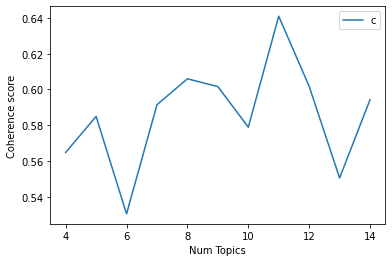

In [ ]:
print(coherence)
a=[x[1] for x in coherence]
plt.plot(np.arange(4,15),a)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=11, \
            id2word = dic, passes=40,
            iterations=200, chunksize = 10000, eval_every = None)

cm = gensim.models.coherencemodel.CoherenceModel(\
      model=ldamodel, texts=token_docs,\
      dictionary=dic, coherence='c_v').get_coherence() 
print(cm) 
model_tfidf.save('/content/drive/MyDrive/DS300/Model_RS_DA/CB/tfidf_LDA_111_15000.model')
dic.save('/content/drive/MyDrive/DS300/Model_RS_DA/CB/dic_LDA_111_15000')
ldamodel.save('/content/drive/MyDrive/DS300/Model_RS_DA/CB/model_LDA_111_15000.model')

0.5961597967027529


In [ ]:
id2word = dic, passes=40,\
               iterations=200, chunksize = 10000, eval_every = None

In [ ]:
print(cm)

0.5792944147652838


In [ ]:
tfidf=gensim.models.TfidfModel.load('/content/drive/MyDrive/DS300/Model_RS_DA/CB/tfidf_LDA_101_1762.model')
dic_lda=corpora.Dictionary.load('/content/drive/MyDrive/DS300/Model_RS_DA/CB/dic_LDA_101_1762')
model_lda=gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/DS300/Model_RS_DA/CB/model_LDA_101_1762.model')



In [ ]:
corpus=[dic_lda.doc2bow(r) for r in token_docs]
corpus=tfidf[corpus]
corpus[0]

[(0, 0.5149690662751346),
 (1, 0.5765928933988368),
 (2, 0.2006185898569616),
 (3, 0.6017471873349121)]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model_lda, corpus, dic_lda)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12     0.104923  0.007924       1        1  9.772883
3      0.206344 -0.139691       2        1  9.466024
1      0.081359  0.183769       3        1  8.254543
11    -0.011345  0.183884       4        1  8.248329
10    -0.188226 -0.070570       5        1  8.003379
5     -0.084352 -0.167626       6        1  7.696025
7      0.071222 -0.185969       7        1  7.620884
9     -0.167253  0.056479       8        1  7.320831
6     -0.136095 -0.008206       9        1  7.267742
0      0.027633  0.022811      10        1  7.243750
8      0.095193  0.093223      11        1  6.576337
4     -0.113647  0.013004      12        1  6.333917
2      0.114244  0.010970      13        1  6.195355, topic_info=           Term        Freq       Total Category  logprob  loglift
252         usb  166.000000  166.000000  Default  30.0000  30.0000
113      tư_vấn  187.000000  187.000000  Default  29.0000  29.0000
58    khởi_động  178.000000  178.000000  Default  28.0000  28.0000
479        wifi  187.000000  187.000000  Default  27.0000  27.0000
125    màn_hình  271.000000  271.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1342     player   13.663555   25.367086  Topic13  -4.9141   2.1626
41         giúp   15.974738  417.472390  Topic13  -4.7578  -0.4818
9           cài   14.833748  354.809961  Topic13  -4.8319  -0.3933
76     phần_mềm   14.535891  306.097187  Topic13  -4.8522  -0.2659
249      driver   14.317554  162.104567  Topic13  -4.8674   0.3546

[690 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
706       1  0.962460     32bit
1489      8  0.959276        3d
1436      8  0.961129        3g
739       7  0.957173       4gb
928      10  0.814655    4share
...     ...       ...       ...
240      11  0.113998    ổ_cứng
890       2  0.363013     ổ_đĩa
890       7  0.622308     ổ_đĩa
1104     11  0.956643   ổn_định
546      12  0.983011  ứng_dụng

[1187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 4, 2, 12, 11, 6, 8, 10, 7, 1, 9, 5, 3])